In [1]:
from general_tools.notebook.gpu_utils import setup_one_gpu
GPU = 2
setup_one_gpu(GPU)

Picking GPU 2


In [2]:
from scipy.io import loadmat
from geo_tool import Point_Cloud
import matplotlib.pylab as plt
from scipy.spatial.distance import pdist
import numpy as np
import tensorflow as tf

In [3]:
from tflearn.layers.core import fully_connected
from tf_lab.point_clouds.encoders_decoders import encoder_with_convs_and_symmetry_new, decoder_with_fc_only
from tf_lab.data_sets.numpy_dataset import NumpyDataset

In [4]:
%matplotlib inline

In [5]:
# LOAD Data
fmaps = '/orions4-zfs/projects/optas/DATA/OUT/latent_parametric_models/lhsmat.mat'
fmaps = loadmat(fmaps)['lhsmat']

params = '/orions4-zfs/projects/optas/DATA/OUT/latent_parametric_models/rhsmat.mat'
params = loadmat(params)['rhsmat']

In [16]:
thres = 1e-7
fmaps[abs(fmaps) < thres] = 0

In [17]:
active_f = []
for i in range(len(fmaps)):
    active_f.append(np.sum(fmaps[:,:,i] > 0))

(array([ 47.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([  1. ,   7.1,  13.2,  19.3,  25.4,  31.5,  37.6,  43.7,  49.8,
         55.9,  62. ]),
 <a list of 10 Patch objects>)

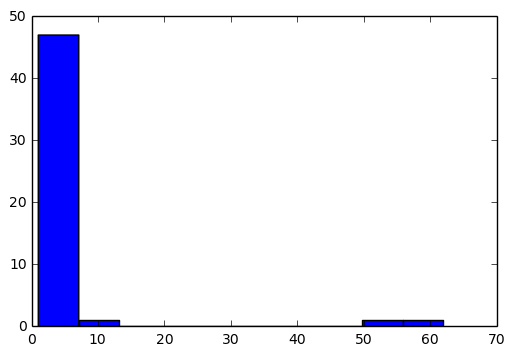

In [18]:
plt.hist(active_f)

In [26]:
# plt.imshow(fmaps[:,:,10], )
# fmaps[:,:,0].shape

0.85856260573827559

In [15]:
train_data = NumpyDataset([fmaps, params], ['fmaps', 'params'])

ValueError: 